# ***Task 1: Take 2 discrete time causal signal and apply convolution***

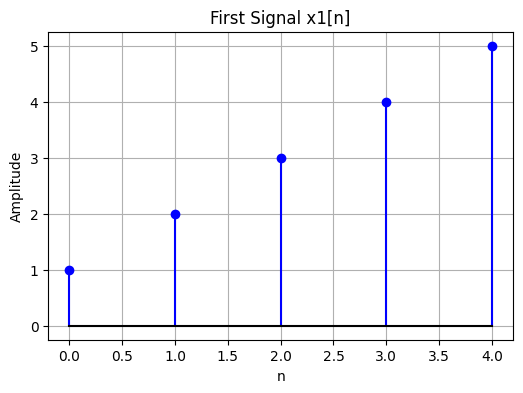

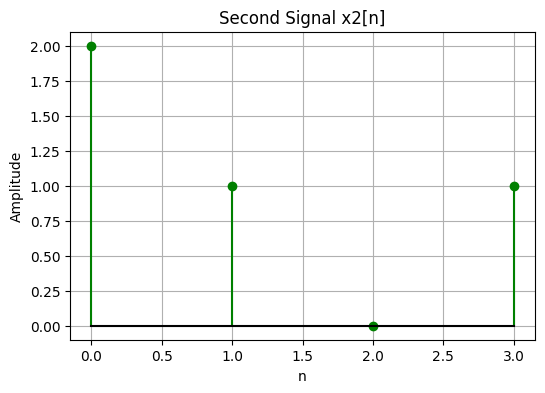

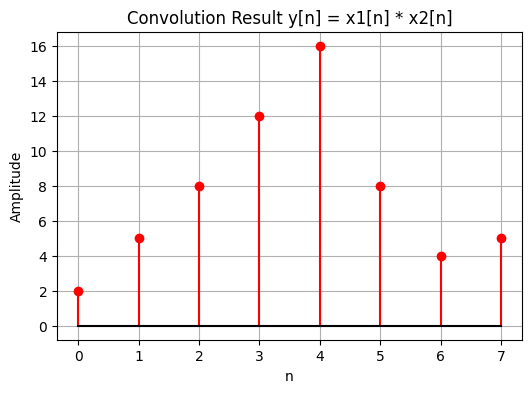

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def convolution(x1, x2):
    """
    Perform linear convolution between two discrete-time signals.
    """
    y = np.convolve(x1, x2)
    return y


# Define two causal signals
n1 = np.arange(0, 5)  # time axis for first signal
x1 = np.array([1, 2, 3, 4, 5])  # first causal signal

n2 = np.arange(0, 4)  # time axis for second signal
x2 = np.array([2, 1, 0, 1])  # second causal signal

# Perform convolution
y = convolution(x1, x2)

# Time axis for convolution result
n_start = n1[0] + n2[0]
n_end = n1[-1] + n2[-1]
n_conv = np.arange(n_start, n_end + 1)


# Plot first signal
plt.figure(figsize=(6, 4))
plt.stem(n1, x1, linefmt='blue', markerfmt='o', basefmt='black')
plt.title('First Signal x1[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot second signal
plt.figure(figsize=(6, 4))
plt.stem(n2, x2, linefmt='green', markerfmt='o', basefmt='black')
plt.title('Second Signal x2[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot convolution result
plt.figure(figsize=(6, 4))
plt.stem(n_conv, y, linefmt='red', markerfmt='o', basefmt='black')
plt.title('Convolution Result y[n] = x1[n] * x2[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# ***Task 2: Generate a discrete time signal with sharp transitions. Apply proper averaging filter on it and show the effects. ***

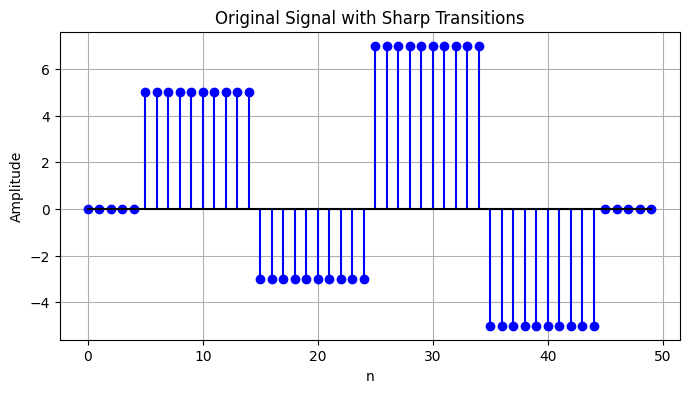

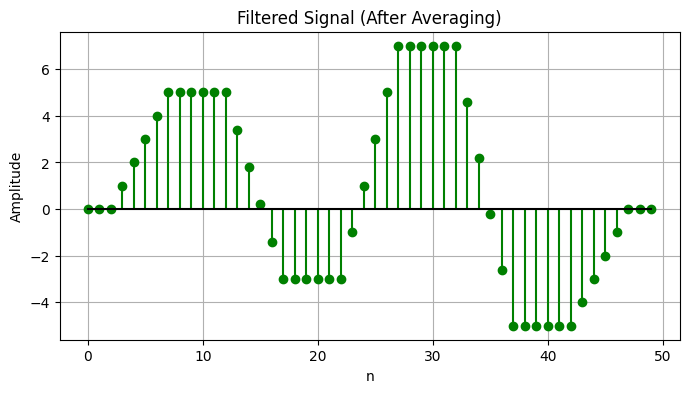

In [3]:
import numpy as np
import matplotlib.pyplot as plt


n = np.arange(0, 50)

# Sharp transitions: sudden jumps
x = np.zeros_like(n)
x[5:15] = 5
x[15:25] = -3
x[25:35] = 7
x[35:45] = -5


# Simple moving average filter of length 5
h = np.ones(5) / 5  # filter coefficients: [0.2, 0.2, 0.2, 0.2, 0.2]

# Apply convolution (filtering)

y = np.convolve(x, h, mode='same')  # mode='same' to keep output size same as input


# Plot original signal
plt.figure(figsize=(8, 4))
plt.stem(n, x, linefmt='blue', markerfmt='o', basefmt='black')
plt.title('Original Signal with Sharp Transitions')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot filtered signal
plt.figure(figsize=(8, 4))
plt.stem(n, y, linefmt='green', markerfmt='o', basefmt='black')
plt.title('Filtered Signal (After Averaging)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# ***Task 3: Generate a sinusoidal signal. Apply random noise on it. Use proper filter to denoise the signal and show the effects. ***

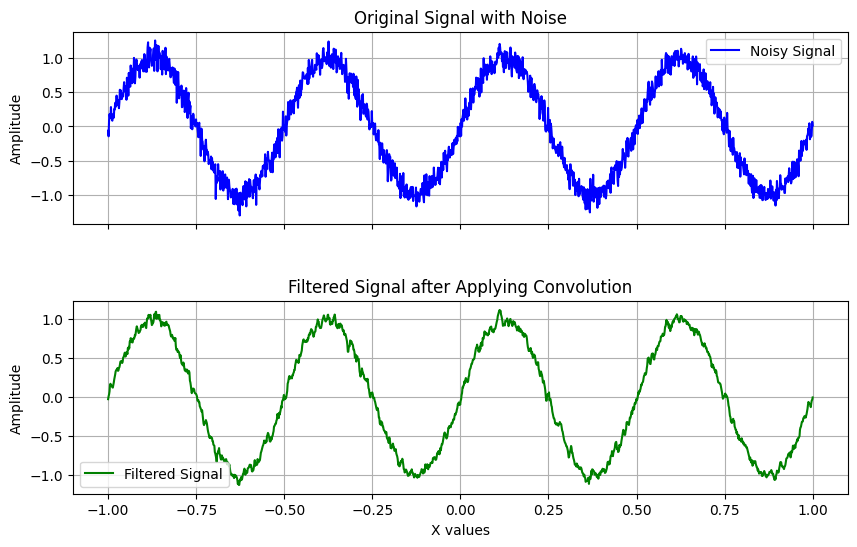

In [4]:
# Define parameters
l = -1  # Left boundary
r = 1   # Right boundary
f = 2   # Frequency
num = 1500  # Number of samples

# Generate x values
x_i = np.linspace(l, r, num)

# Generate sine wave signal
y_o = np.sin(2 * np.pi * f * x_i)

# Add Gaussian noise
noise = np.random.normal(0, 0.1, num)
# mean = 0, standard deviation = 0.1, number of points = 1500, all the points lies between [-0.1, 0.1]
y_o = y_o + noise

# Define the filter (moving average)
filter = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# Apply convolution (moving average filter)
filtered_output = np.convolve(y_o, filter, mode='same')
# mode = 'same' indicates: returns an output of the same size as the input signal.

# Create plots
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot noisy signal
axes[0].plot(x_i, y_o, label="Noisy Signal", color='b')
axes[0].set_title("Original Signal with Noise")
axes[0].set_ylabel("Amplitude")
axes[0].grid(True)
axes[0].legend()

# Plot filtered signal
axes[1].plot(x_i, filtered_output, label="Filtered Signal", color='g')
axes[1].set_title("Filtered Signal after Applying Convolution")
axes[1].set_xlabel("X values")
axes[1].set_ylabel("Amplitude")
axes[1].grid(True)
axes[1].legend()

# Adjust spacing
plt.subplots_adjust(hspace=0.4)

# Show the plots
plt.show()


# ***Task 4:Take 2 discrete time signals and show the correlation between them in different time delay and try to interpret the purpose.***